In [1]:

#pandas for reading dataset and cleaning dataset 
import pandas as pd

#seaborn for ploting... graph
import seaborn as sbn

#matplotLib for ploting

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

#Skelarn for Model Creation  and Label Encoding 
from sklearn.preprocessing import LabelEncoder ,StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix

#Use train test split to divide dataset into 2 part 
from sklearn.model_selection import train_test_split


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler



In [2]:
dataset=pd.read_csv('laptopPrice.csv')

In [3]:
dataset.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
dataset.isna().sum()


brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [6]:
missing = dataset.isna().any(axis=1)
dataset[missing]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [7]:
dataset = dataset.dropna()


In [8]:
missing = dataset.isna().any(axis=1)
dataset[missing]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [9]:
dataset.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [10]:
le = LabelEncoder()
for item in dataset.astype("object").columns:
    dataset[item] = le.fit_transform(dataset[item])

In [11]:
dataset.head(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,31,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,50,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,55,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,198,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,13,2,0,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   brand              823 non-null    int64
 1   processor_brand    823 non-null    int64
 2   processor_name     823 non-null    int64
 3   processor_gnrtn    823 non-null    int64
 4   ram_gb             823 non-null    int64
 5   ram_type           823 non-null    int64
 6   ssd                823 non-null    int64
 7   hdd                823 non-null    int64
 8   os                 823 non-null    int64
 9   os_bit             823 non-null    int64
 10  graphic_card_gb    823 non-null    int64
 11  weight             823 non-null    int64
 12  warranty           823 non-null    int64
 13  Touchscreen        823 non-null    int64
 14  msoffice           823 non-null    int64
 15  Price              823 non-null    int64
 16  rating             823 non-null    int64
 17  Number of Rating

## EDA

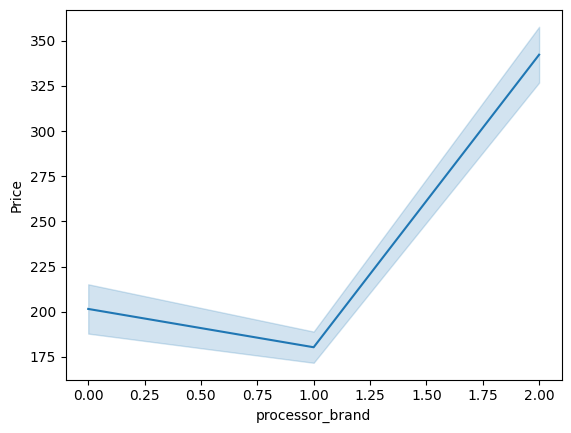

In [13]:
sbn.lineplot(data=dataset,x="processor_brand",y="Price")
plt.show()

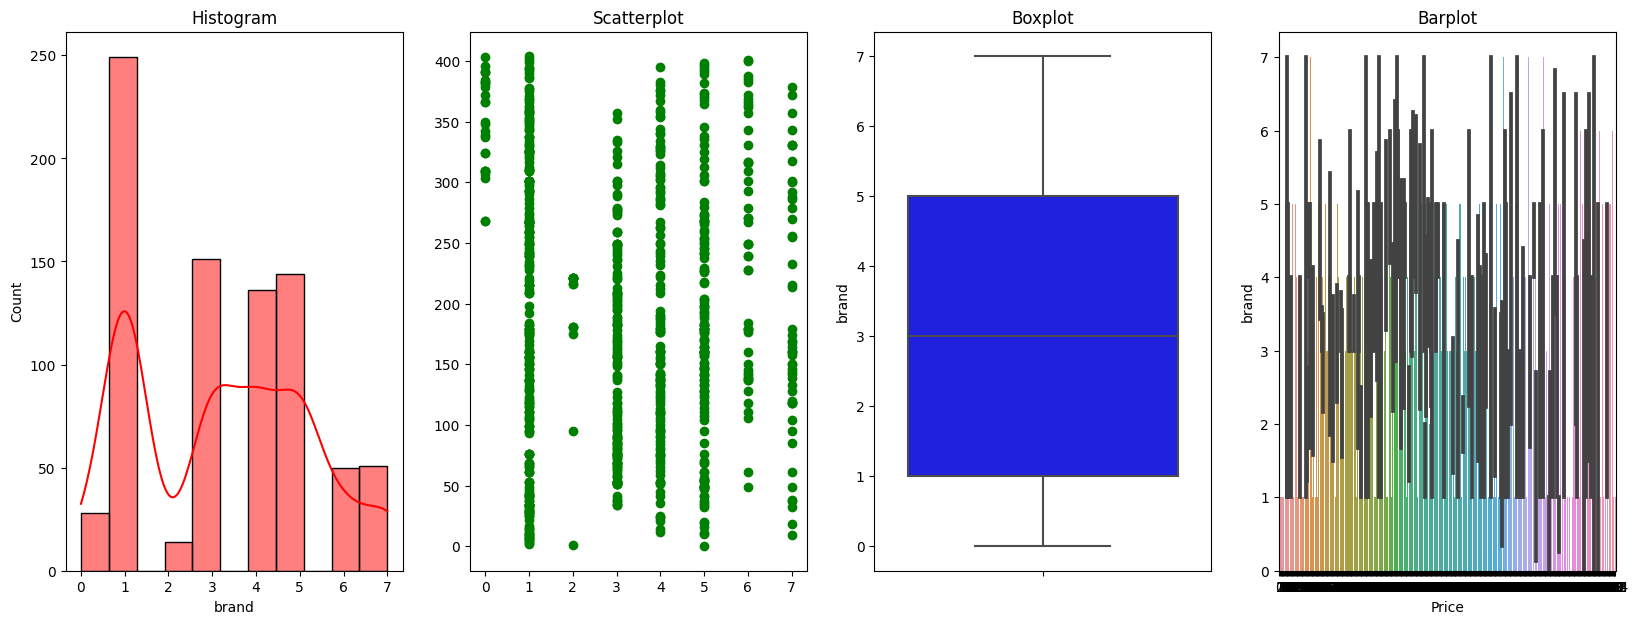

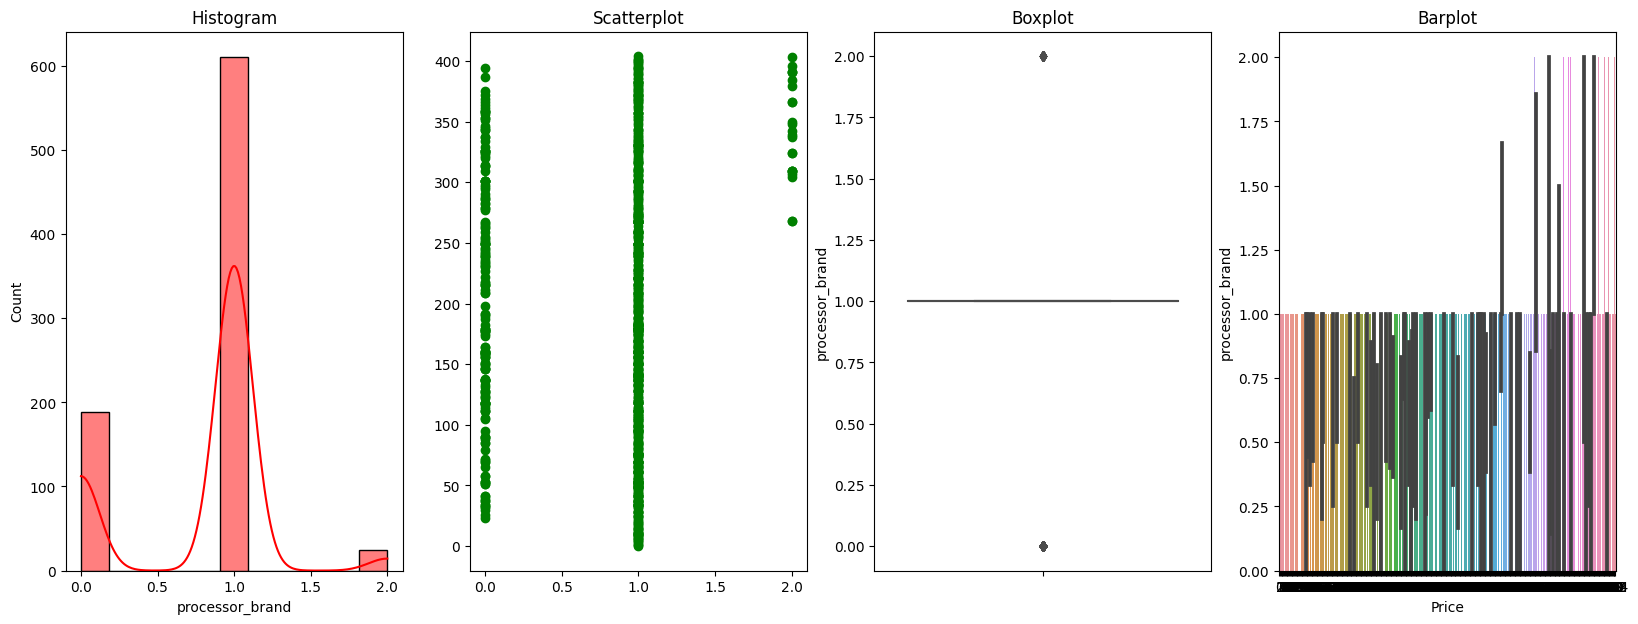

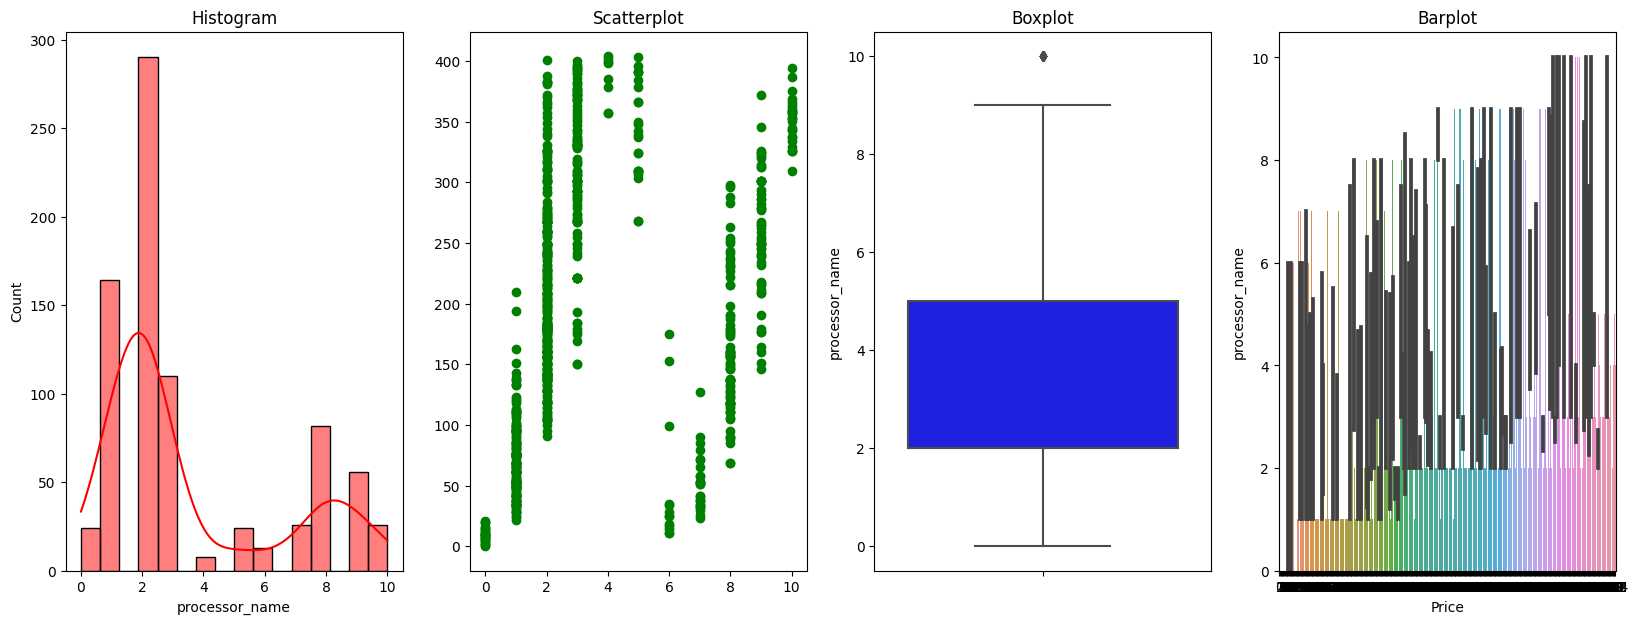

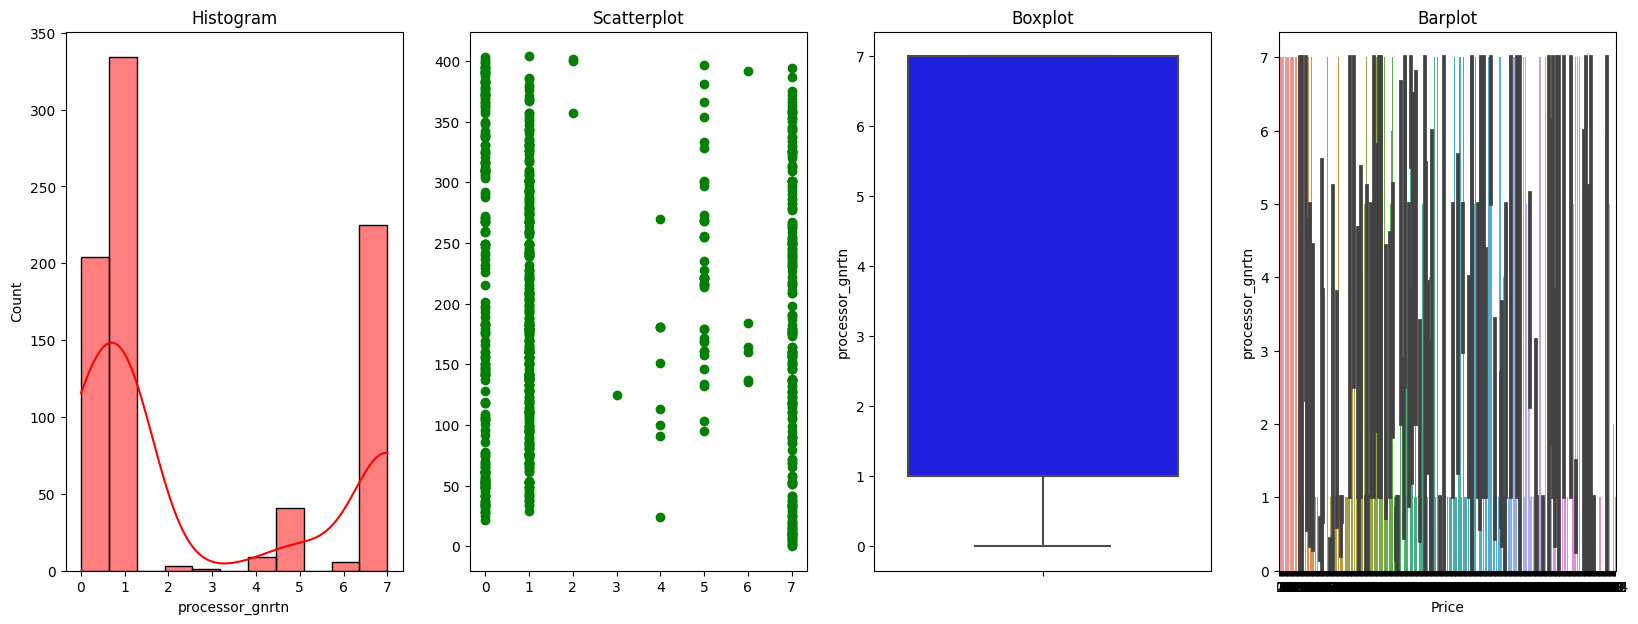

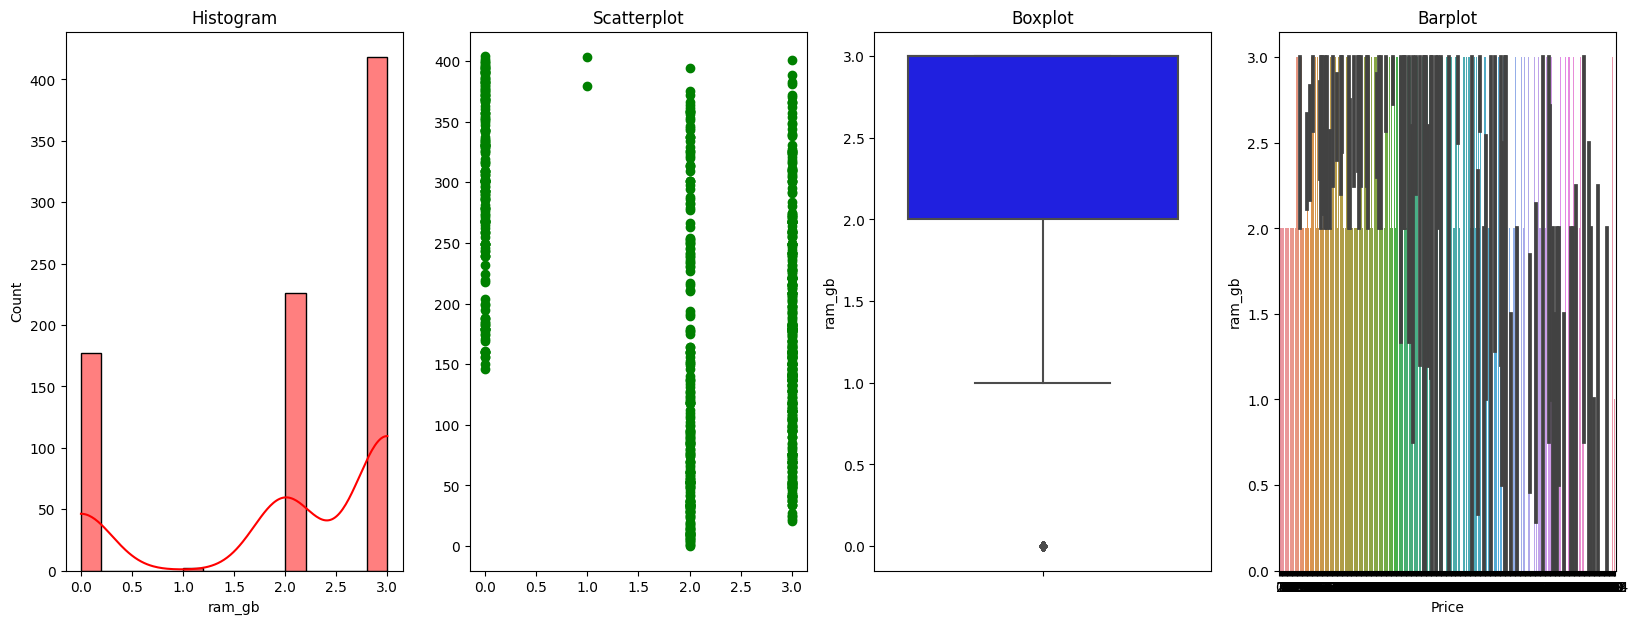

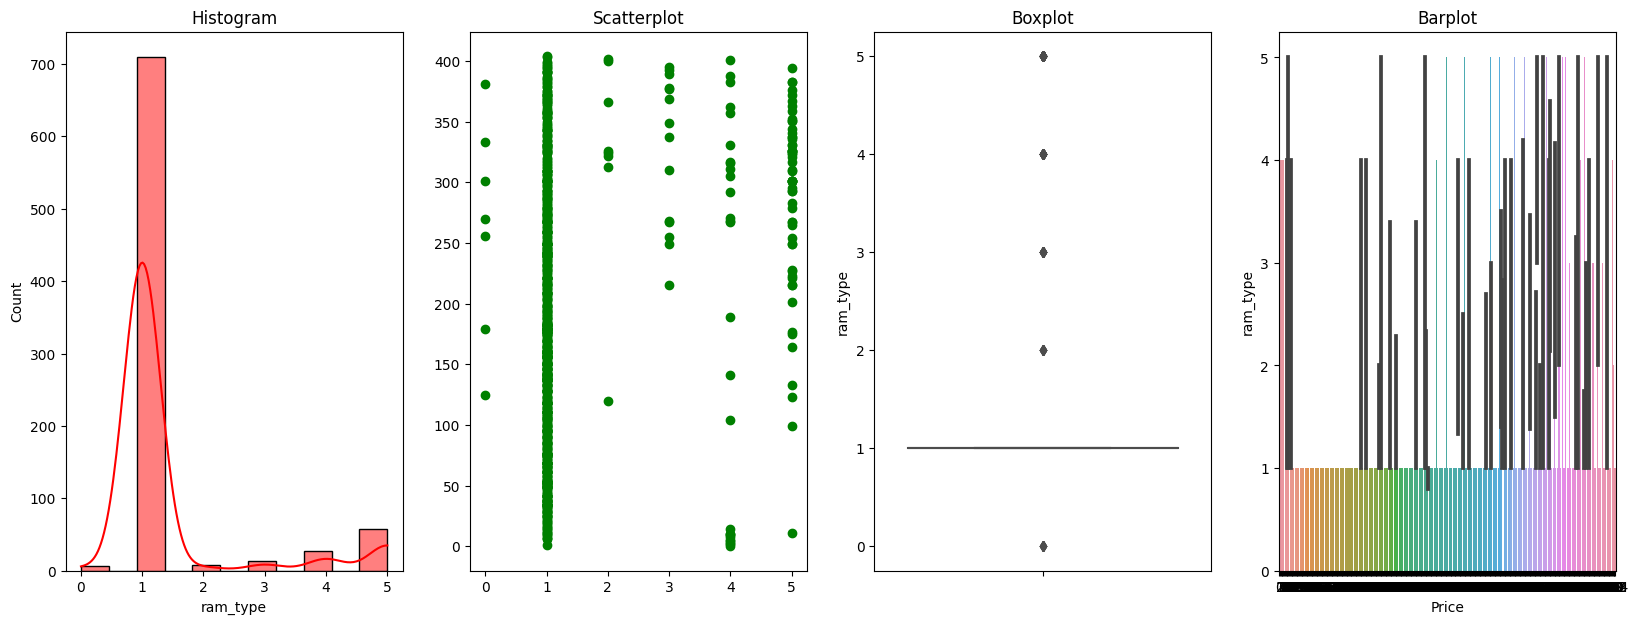

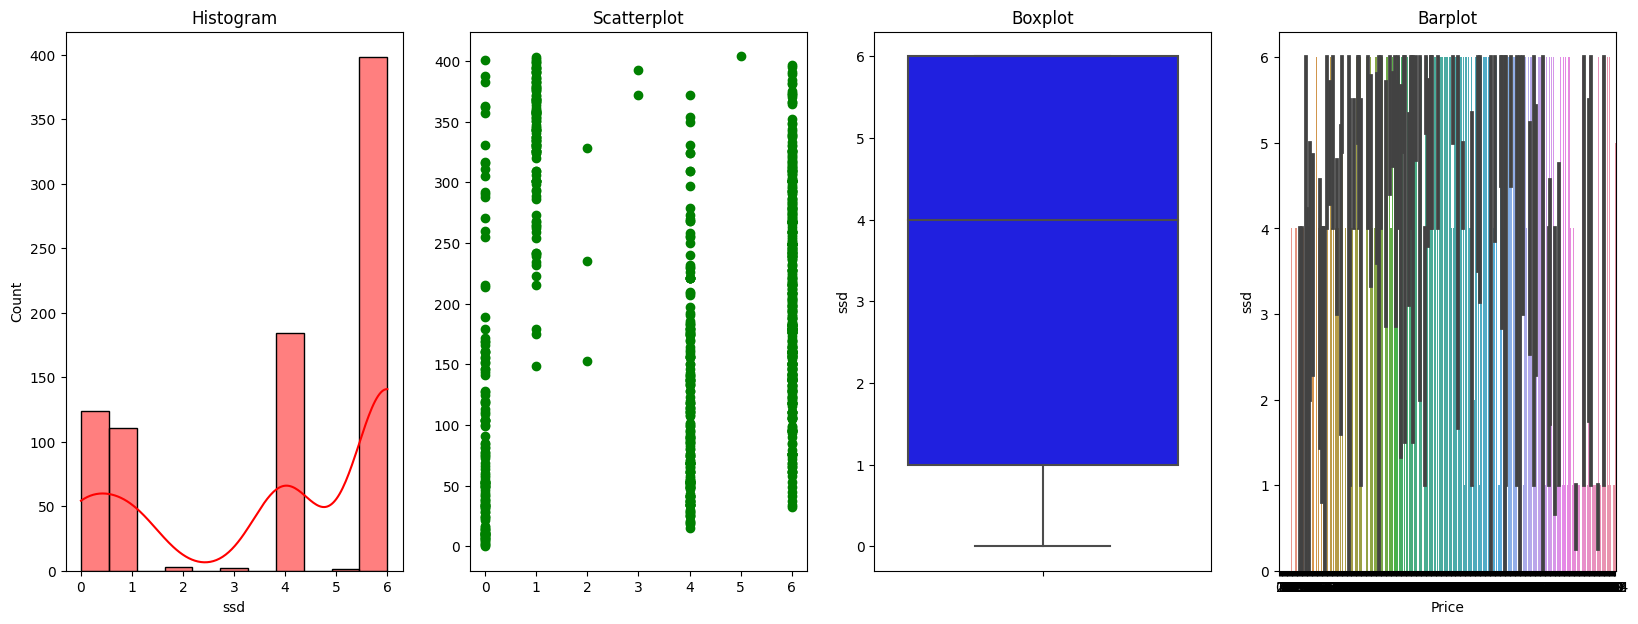

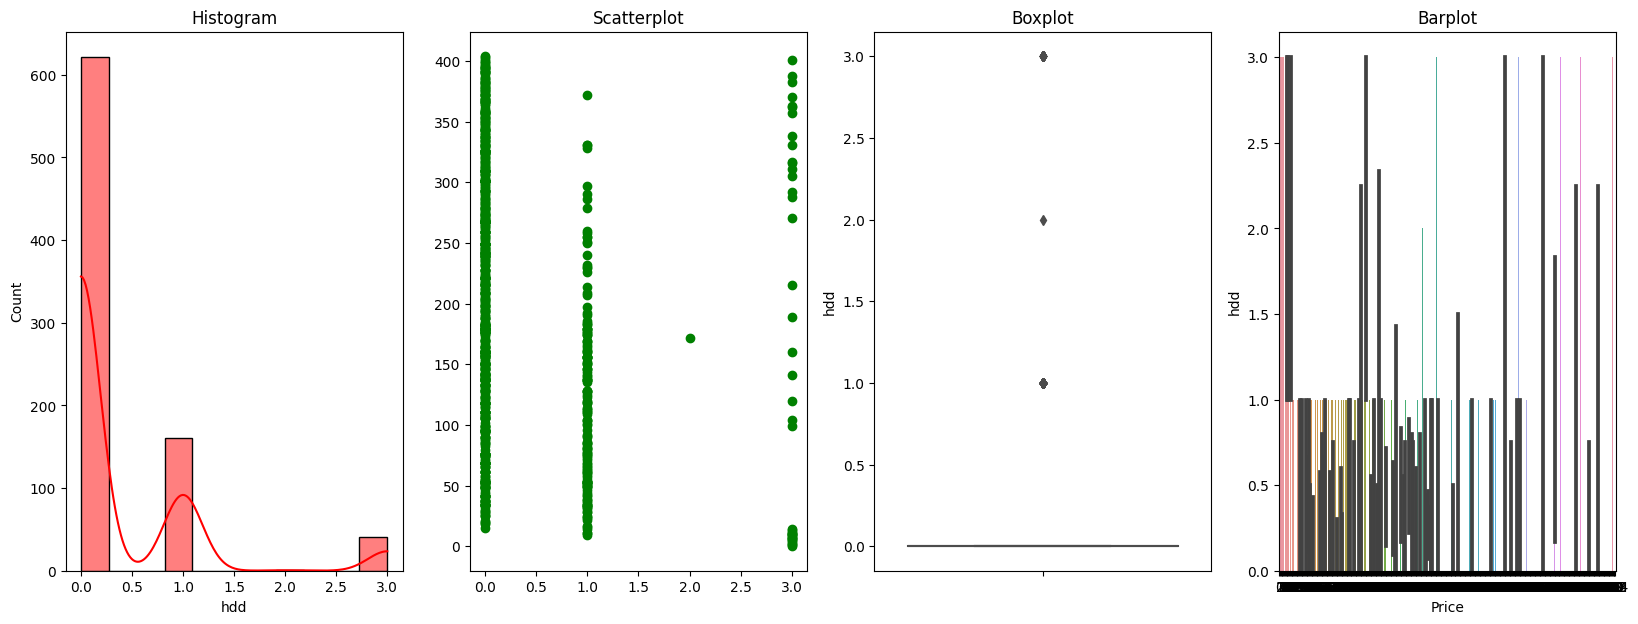

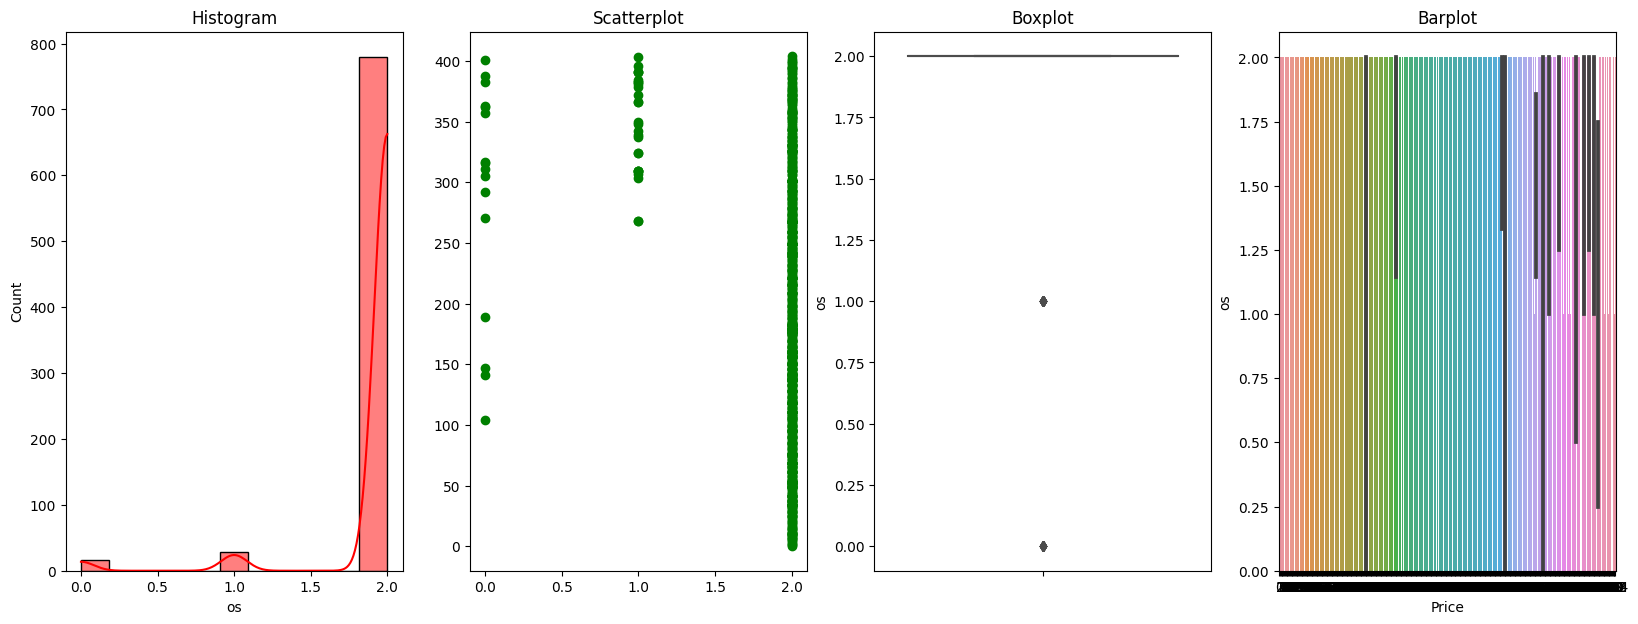

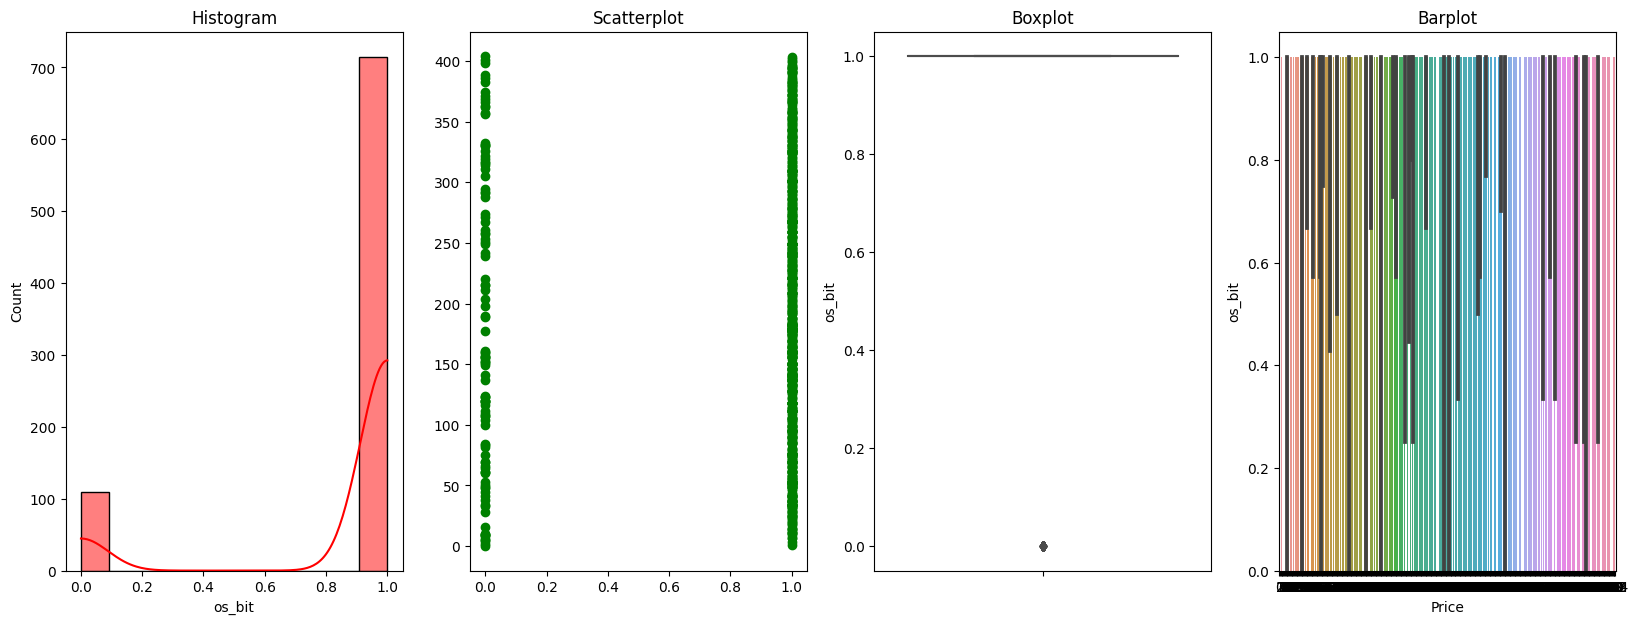

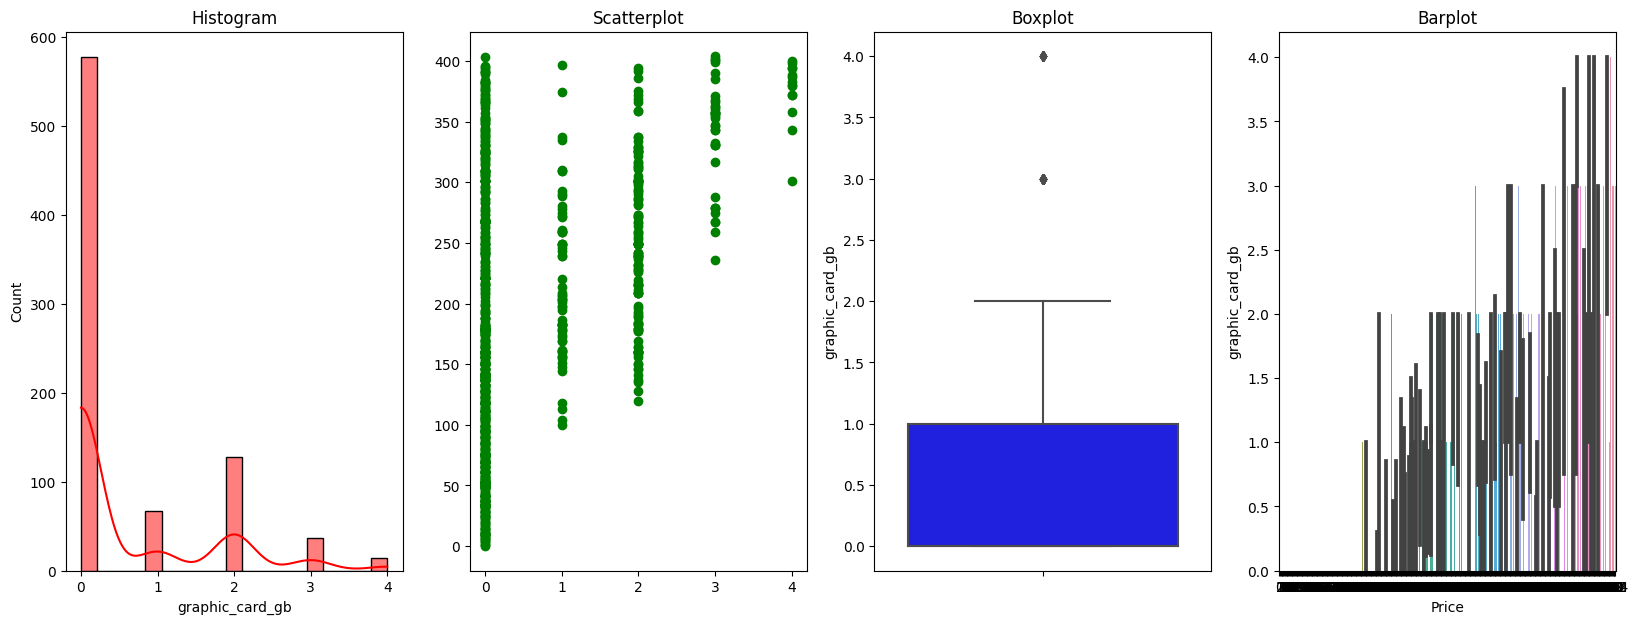

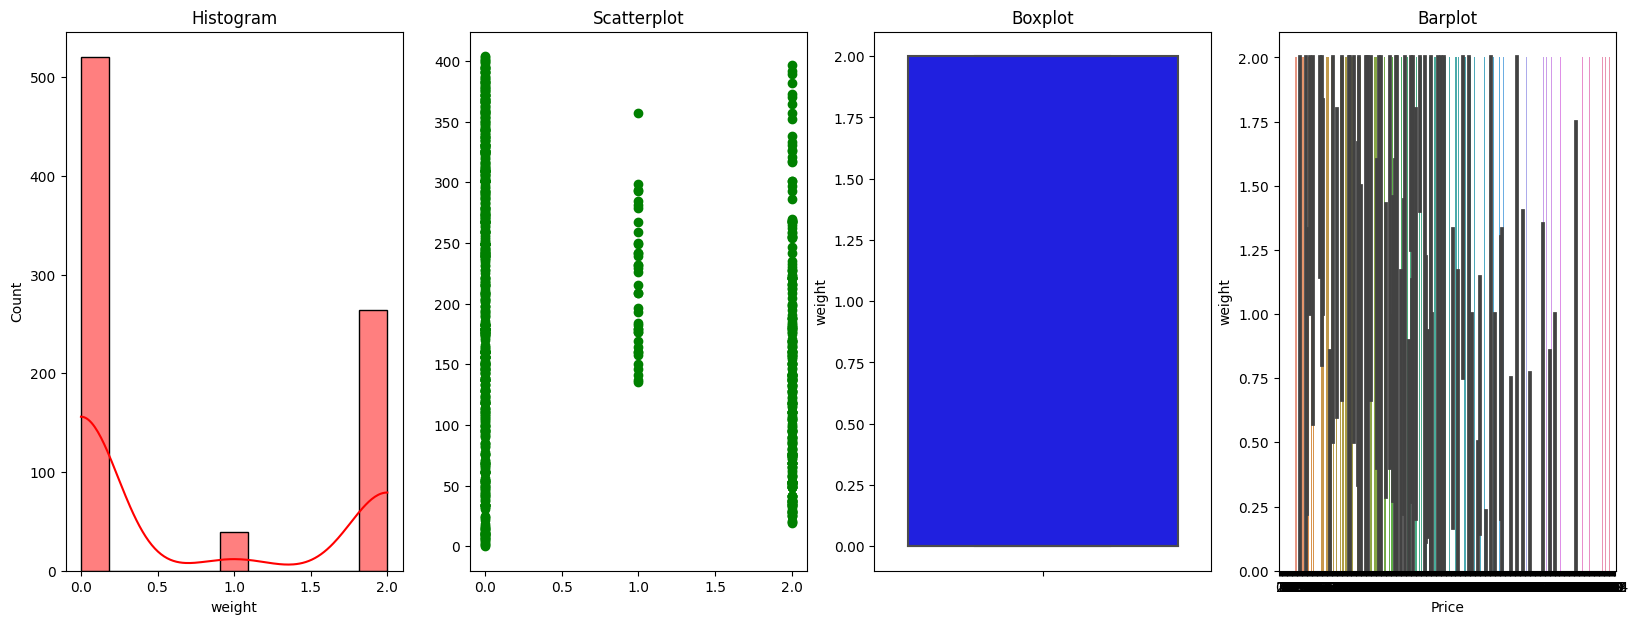

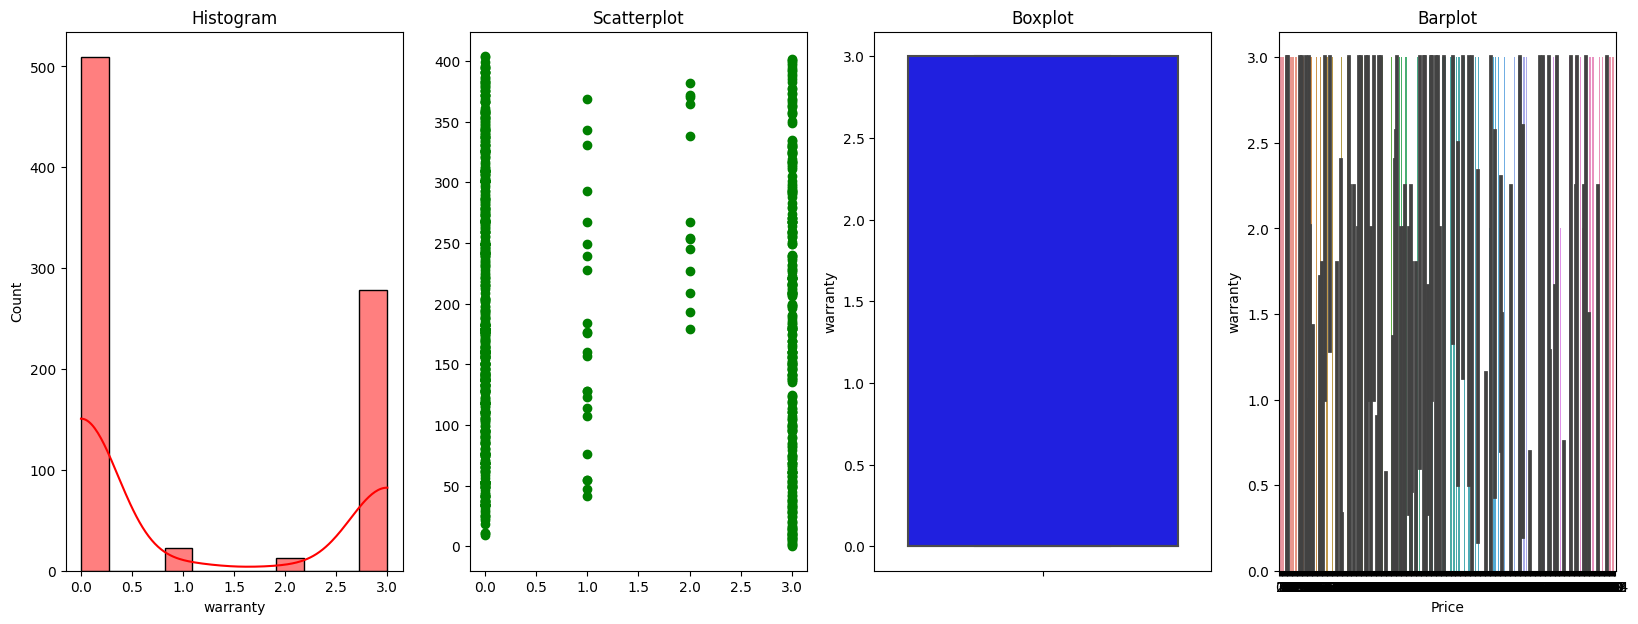

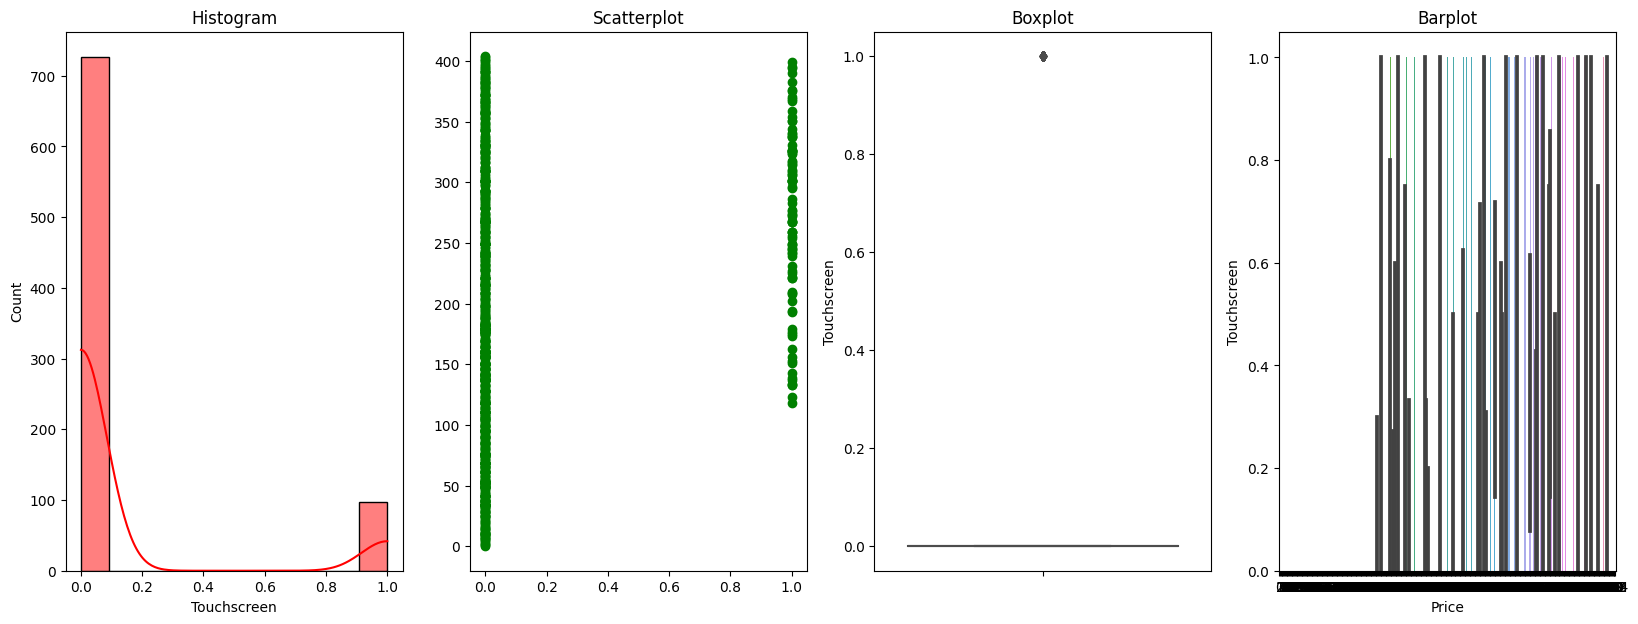

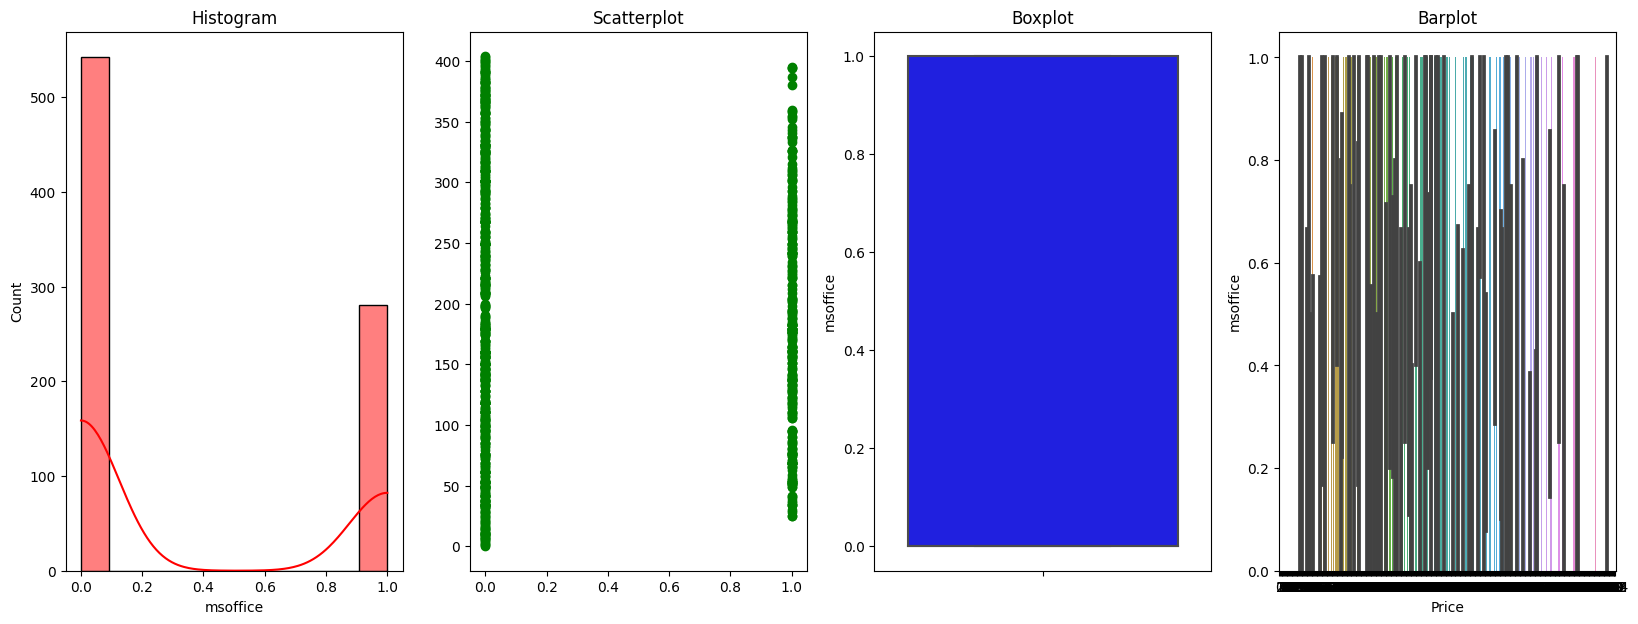

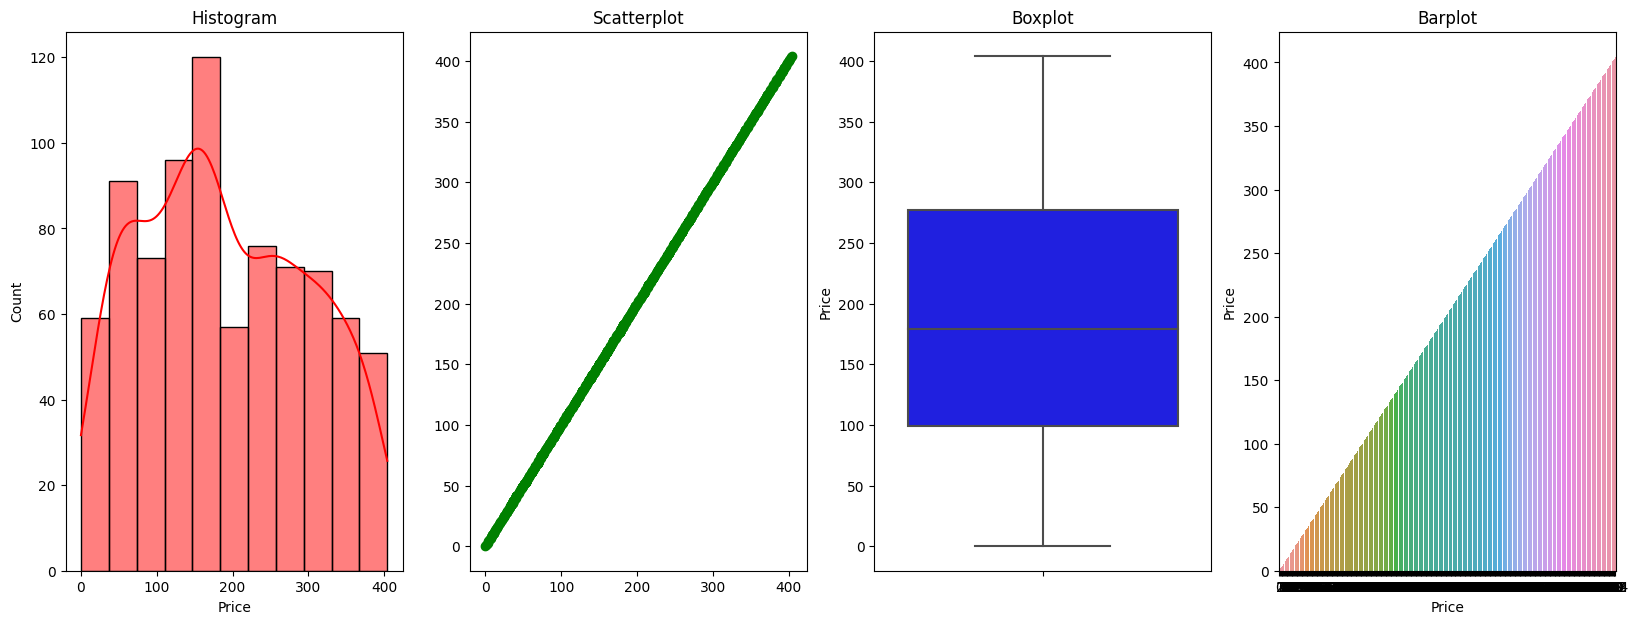

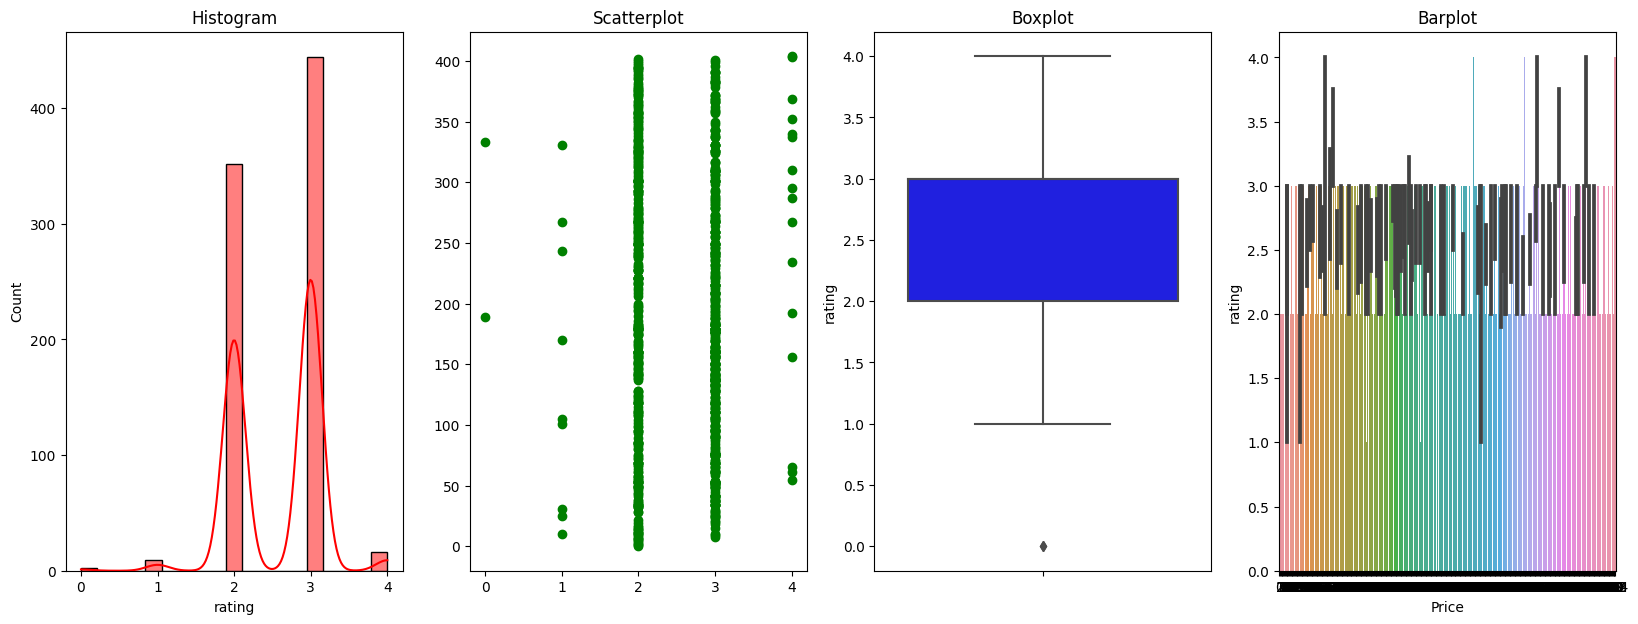

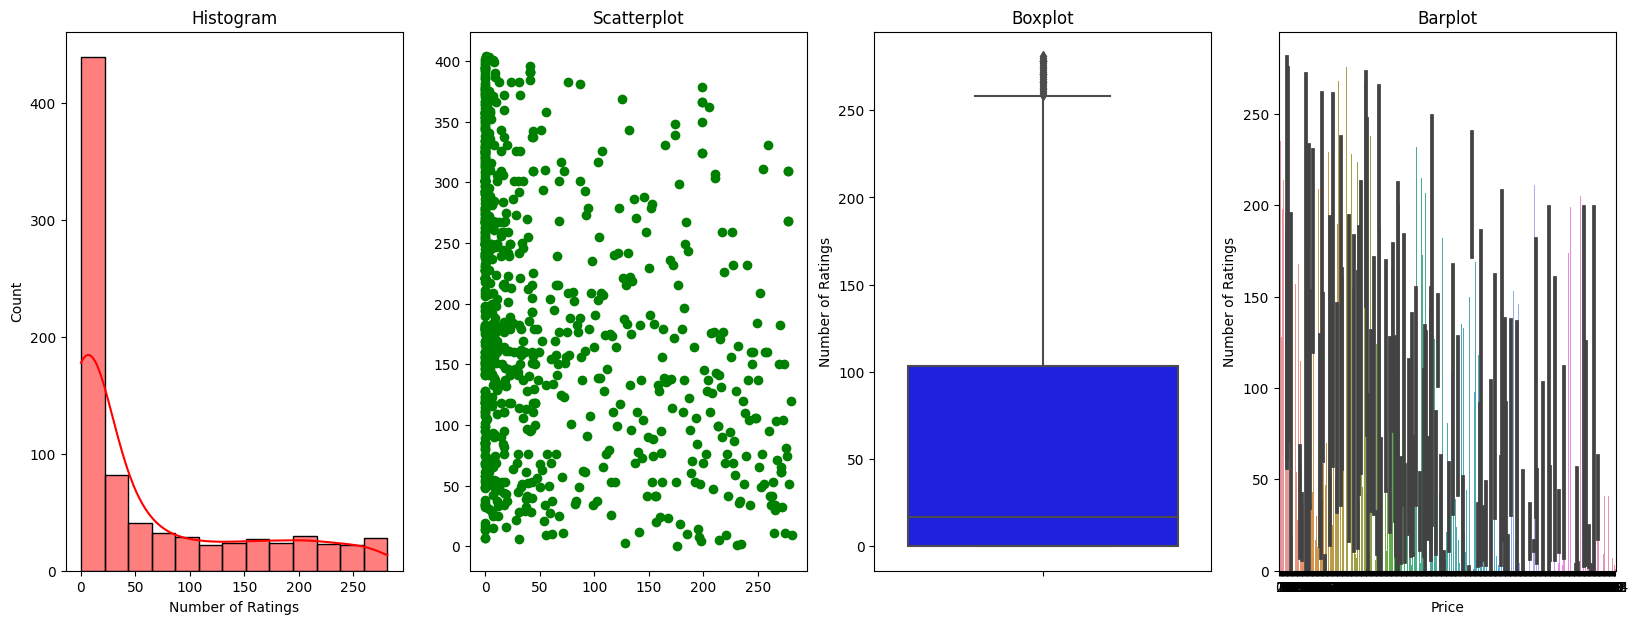

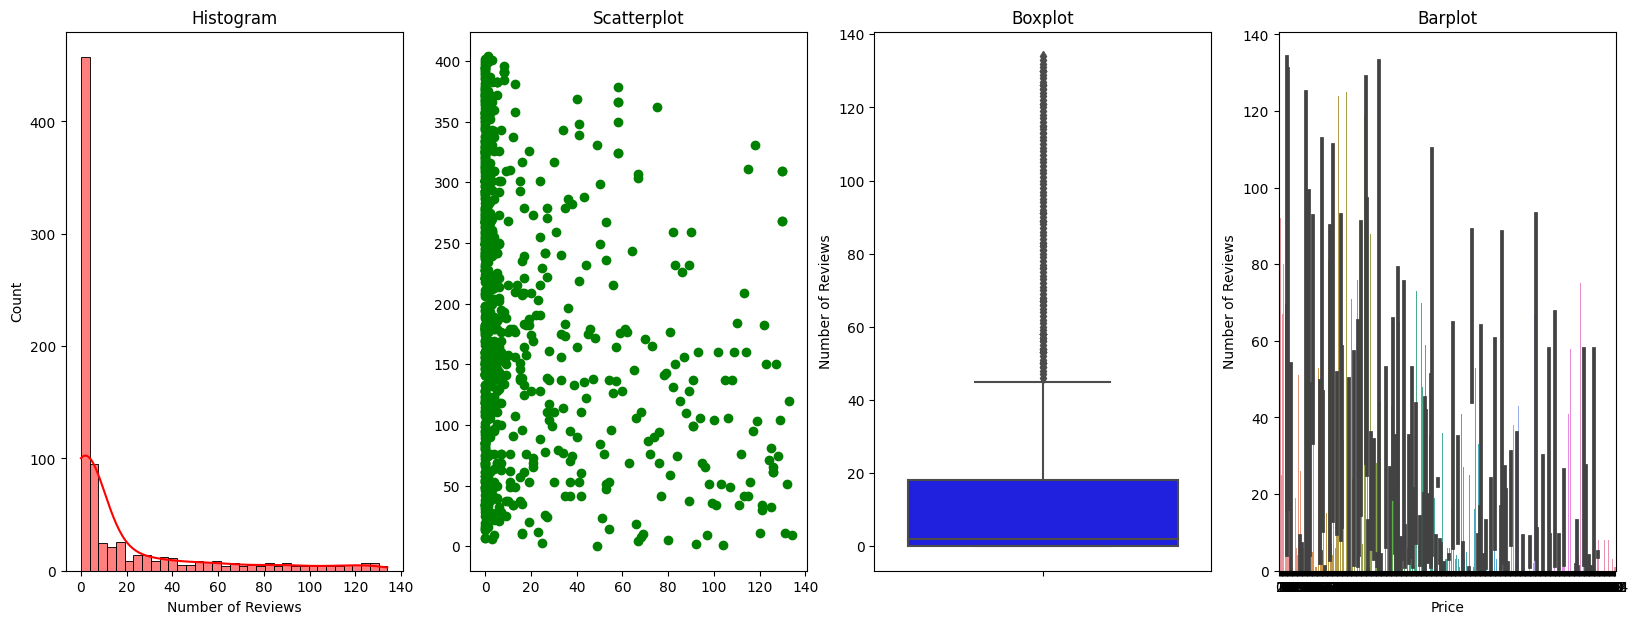

In [14]:
def diagnostic_plots(df, variable,target):

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sbn.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    try:
        plt.subplot(1, 4, 3)
        sbn.boxplot(y=df[variable],color = 'b')
        plt.title('Boxplot')
    except Exception as ex:
        print(ex)
    
    # barplot
    plt.subplot(1, 4, 4)
    sbn.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()
    
for item in dataset:
    diagnostic_plots(dataset,item,'Price')

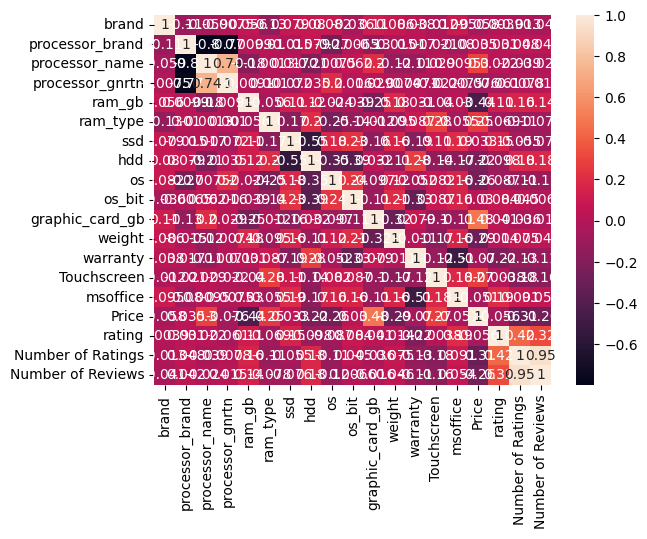

In [15]:
sbn.heatmap(dataset.corr(),annot=True)
plt.show()

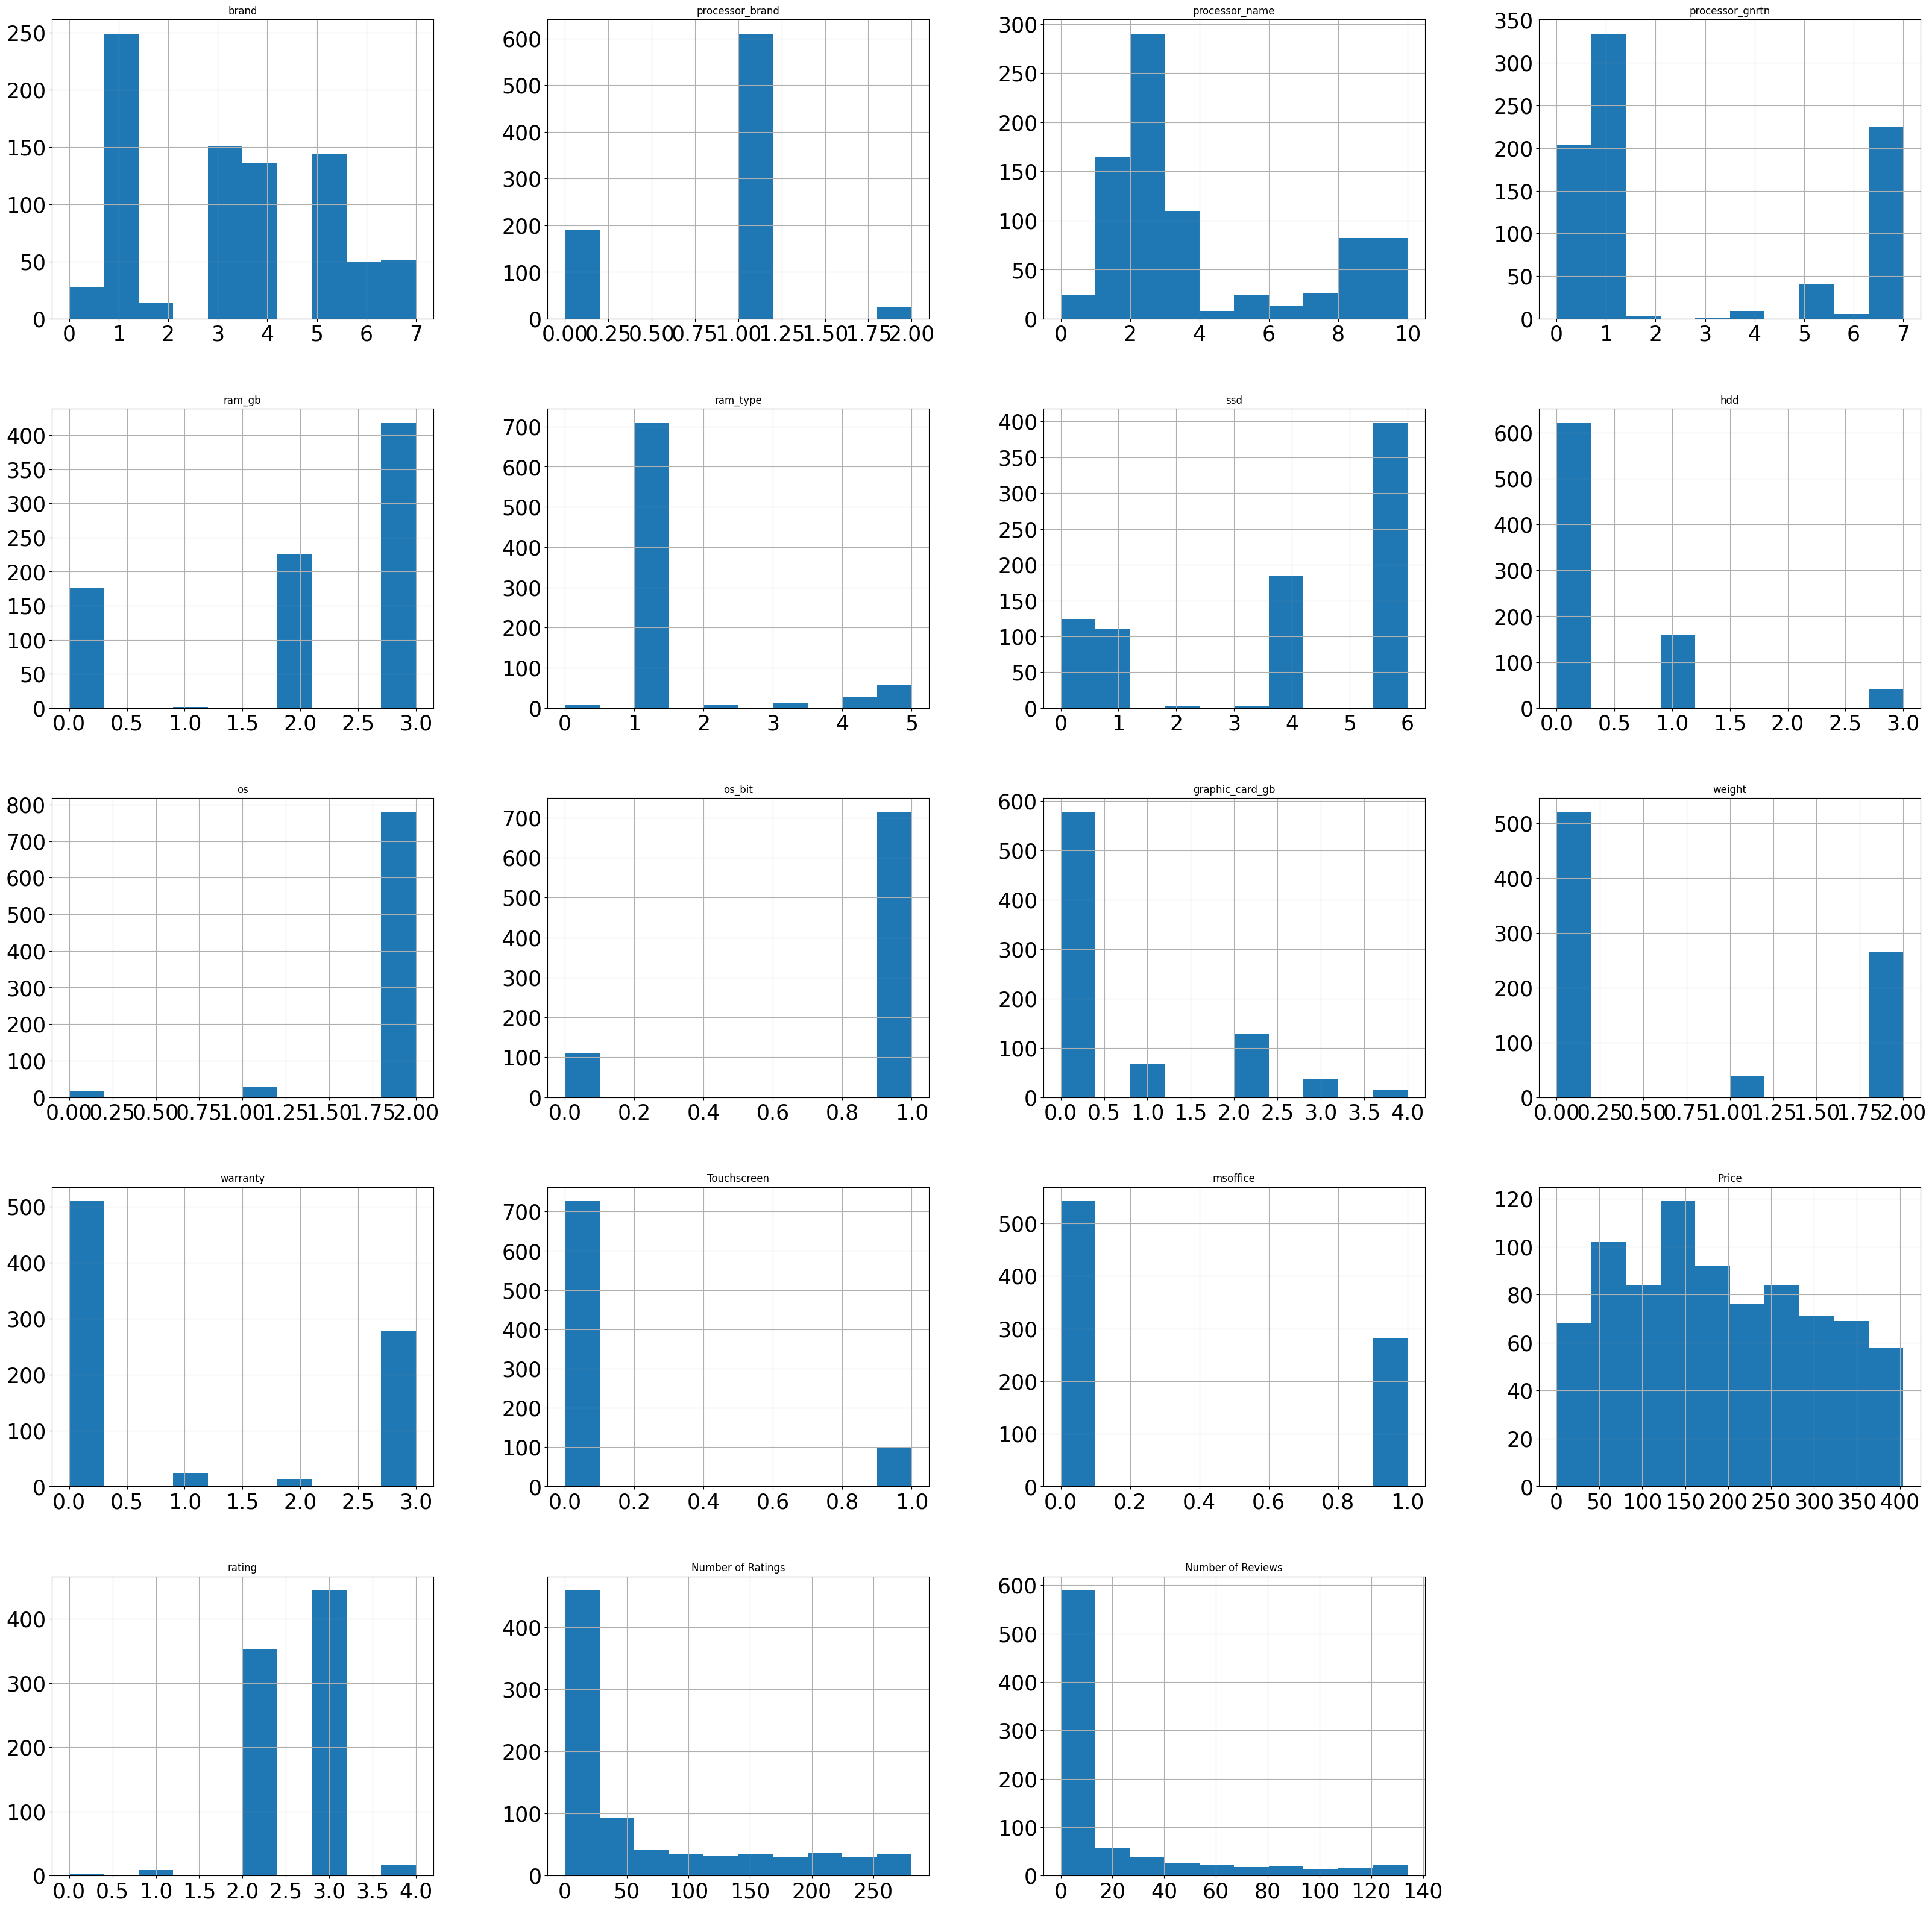

In [16]:
dataset.hist(figsize=(40,40),xlabelsize=25,ylabelsize=25)
plt.show()

In [17]:

label = dataset["Price"]
features = dataset.drop("Price",axis=1)

In [18]:
dataset.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,31,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,50,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,55,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,198,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,13,2,0,0


In [19]:
features.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,2,0,0


In [20]:
label.head()

0     31
1     50
2     55
3    198
4     13
Name: Price, dtype: int64

## Split the data into training and test 

In [21]:
sc = StandardScaler()
features[features.columns] = sc.fit_transform(features[features.columns])
features[features.columns] = sc.fit_transform(features[features.columns])

In [22]:
xtrain , xtest , ytrain, ytest = train_test_split(features,label,test_size=0.2,shuffle=True)

In [23]:
print(ytrain.value_counts())
print(ytest.value_counts())

Price
160    14
249    13
267    10
53     10
179    10
       ..
299     1
396     1
79      1
260     1
368     1
Name: count, Length: 343, dtype: int64
Price
179    5
301    5
259    4
239    3
61     3
      ..
388    1
55     1
46     1
397    1
314    1
Name: count, Length: 120, dtype: int64


In [24]:
#try with Logistic regression
model =GradientBoostingRegressor()
model.fit(xtrain,ytrain)

#accuracy score
print("score = ",model.score(xtest,ytest))
pred = model.predict(xtest)

print("MESE =",mean_squared_error(pred,ytest))

print("r2 score= ",r2_score(pred,ytest))



score =  0.8893579905875133
MESE = 1323.5003830858136
r2 score=  0.863255472333446


In [25]:
model =LinearRegression()
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

pred = model.predict(xtest)

print(mean_squared_error(pred,ytest))

print(r2_score(pred,ytest))

2760.1429327575524
0.6315974457468084
